In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split

dataframe_url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'

In [49]:
df = pd.read_csv(dataframe_url)
print(f"The dataframe contains the following information:\n {df.columns}")

# Check total number of rows and columns in the dataframe.
print(f"Total number of samples is '{df.shape[0]}' and there are '{len(df.columns[:-1])}' attributes to inference the '{df.columns[-1]}' column.", end="\n\n")

# Obtain a brief look of the dataframe.
print(f"Visualize the first few samples:\n{df.head()}", end="\n\n")

# Check if any entry contains a NULL value.
print(f"Does any entry contain a NULL value?\n{df.isnull().sum()}")
# Eliminate row if that is the case.
df.dropna(how='all', axis=0, inplace=True)

The dataframe contains the following information:
 Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
Total number of samples is '150' and there are '4' attributes to inference the 'species' column.

Visualize the first few samples:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Does any entry contain a NULL value?
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


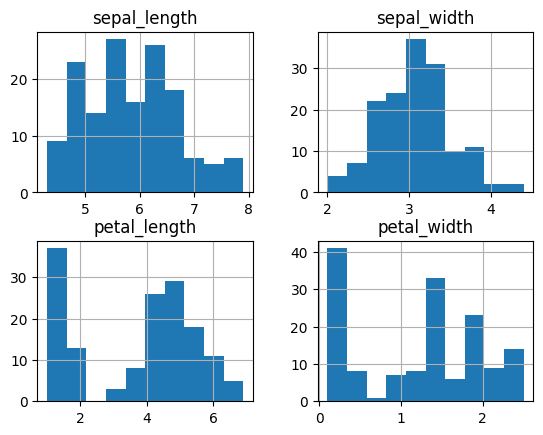

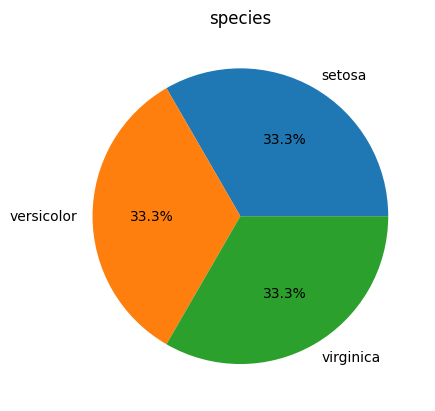

In [50]:
# Visualize the data in a histogram ...
df.hist(backend='matplotlib')
plt.show()

# ... or in Pie Chart (last column)
df[df.columns[-1]].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title(f"{df.columns[-1]}")
plt.ylabel("") # Hide vertical label.
plt.show()

In [51]:
# Convert label into numeric values.
label = df.columns[-1]
df[label] = df[label].astype('category').cat.codes

# Divide dataframe.
data = df.drop(label, axis=1).values
target = df[label].values

# Efectuate the partition of the dataset into training and testing data.
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.4, random_state=42)
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Training target shape: {y_train.shape}")
print(f"Testing target shape: {y_test.shape}")

Training data shape: (90, 4)
Testing data shape: (60, 4)
Training target shape: (90,)
Testing target shape: (60,)


In [52]:
# Convert data into Pytorch tensors.
x_train = torch.tensor(x_train, dtype=torch.float32)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create datasets and loaders. 
train_dataset = TensorDataset(x_train, y_train)
test_dataset = TensorDataset(x_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the Network internal structure.
class Classifier(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Classifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [53]:
# Instantiate the model itself.
model = Classifier(input_dim=x_train.shape[1], 
                   hidden_dim=64, 
                   output_dim=len(np.unique(target))
                   )
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# TRAINING MODE.
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        # Forward pass.
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward pass and optimization.
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# EVALUATION MODE.
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()
    
    print(f'Accuracy of the model on the test set: {100 * correct / total:.2f}%')

torch.save(model, 'iris_model.pth')

Epoch [1/50], Loss: 1.1954
Epoch [2/50], Loss: 1.0691
Epoch [3/50], Loss: 1.0555
Epoch [4/50], Loss: 0.9819
Epoch [5/50], Loss: 0.9754
Epoch [6/50], Loss: 0.9553
Epoch [7/50], Loss: 0.8795
Epoch [8/50], Loss: 0.9170
Epoch [9/50], Loss: 0.9089
Epoch [10/50], Loss: 0.8598
Epoch [11/50], Loss: 0.8439
Epoch [12/50], Loss: 0.7937
Epoch [13/50], Loss: 0.7796
Epoch [14/50], Loss: 0.7737
Epoch [15/50], Loss: 0.7355
Epoch [16/50], Loss: 0.6834
Epoch [17/50], Loss: 0.7759
Epoch [18/50], Loss: 0.7272
Epoch [19/50], Loss: 0.6760
Epoch [20/50], Loss: 0.6518
Epoch [21/50], Loss: 0.6686
Epoch [22/50], Loss: 0.6836
Epoch [23/50], Loss: 0.6452
Epoch [24/50], Loss: 0.4996
Epoch [25/50], Loss: 0.5650
Epoch [26/50], Loss: 0.6054
Epoch [27/50], Loss: 0.5902
Epoch [28/50], Loss: 0.6001
Epoch [29/50], Loss: 0.5367
Epoch [30/50], Loss: 0.5373
Epoch [31/50], Loss: 0.5236
Epoch [32/50], Loss: 0.5034
Epoch [33/50], Loss: 0.5636
Epoch [34/50], Loss: 0.4623
Epoch [35/50], Loss: 0.4929
Epoch [36/50], Loss: 0.4708
E